In [6]:
#from ExtractingFrameFeatures import getSimilarityMatrix
import Segmantation_lib as sg
import evaluationMetrics as em
import cv2
import math
import numpy as np
import sys
import pandas as pd
from sklearn.preprocessing import normalize
import Text_representations as tr
import Subtitle as sb
import nlpPreprocessing as nlp
import pickle
import os

In [7]:
videoFile='/people/berhe/Bureau/video/GameOfThrones.Season01.Episode02.mkv'
shot='/people/berhe/Bureau/video/GameOfThrones.Season01.Episode01_threshold_1.5.json'

In [23]:
dirFeatures='/vol/work3/berhe/ExtractedFeatures/BB/'
dirFeaturesGoT='/vol/work3/berhe/ExtractedFeatures/GoT/'
dirFeaturesGoT1='/vol/work3/berhe/ExtractedFeatures/GameOfThrones/'
shot=dirFeaturesGoT+'GameOfThrones.Season01.Episode01.mkv_shot.json'
shotBB=dirFeatures+'BreakingBad.Season01.Episode01.mkv_shot.json'

In [9]:
season,episode=input('chose the season and Episode').split(' ')
Season="Season0"+str(season)
Episode=("Episode"+str(episode)) if int(episode) > 10 else ("Episode0"+str(episode))
fileName=Season+'.'+Episode
for fn in os.listdir(dirFeatures):
    if fileName in fn:
        print (fn)

chose the season and Episode1 1
BreakingBad.Season01.Episode01.mkv_features.npy
BreakingBad.Season01.Episode01.mkv_frameTimeStamp.pkl
BreakingBad.Season01.Episode01.mkv_shot.json


In [11]:
letter,season,episode=input('chose the season and Episode').split(' ')

chose the season and Episodeg 1 1


In [12]:
Season="Season0"+str(season)
Episode=("Episode"+str(episode)) if int(episode) > 10 else ("Episode0"+str(episode))
dirFeatures+Season+'.'+Episode
fileName=Season+'.'+Episode
if letter=='g':
    subFile='/people/berhe/Bureau/TLP_thesis/subtitles/GoT/English/GameOfThrones.'+fileName+'.en.srt'
else:
    subFile='/people/berhe/Bureau/TLP_thesis/subtitles/BB/English/Breaking.'+fileName+'.en.srt'

In [13]:
Season="S0"+str(season)
Episode=(str(episode)) if int(episode) > 10 else ("0"+str(episode))
fileName=Season+'E'+Episode
manAnnotation=""
if letter=='G' or letter == 'g':
    manAnnotation='/people/berhe/Bureau/TLP_thesis/codes/AnnotatedScene/Got/'+'season'+str(season)+'/Scenes/'
else:
    manAnnotation='/people/berhe/Bureau/TLP_thesis/codes/AnnotatedScene/BreakingBad/'+'season'+str(season)+'/Scenes/'
Df=pd.read_csv(manAnnotation+fileName, delimiter="\t")
sc_end=Df['end']

In [14]:
for i in range(0,len(shotEnd)):
    texts=sub.getsubSentences(shotEnd[i-1],shotEnd[i])
    print(texts)

NameError: name 'shotEnd' is not defined

In [343]:
print(texts)

The Segment Does not have a Textor Dialogue!


In [16]:
framesFeatures=np.load(dirFeaturesGoT+'GameOfThrones.Season01.Episode01.mkv_features.npy')
with open(dirFeaturesGoT+'GameOfThrones.Season01.Episode01.mkv_frameTimeStamp.pkl', 'rb') as f:
    timeStamp=pickle.load(f)

Breaking Bad 

In [3]:
framesFeatures=np.load(dirFeatures+'BreakingBad.Season01.Episode01.mkv_features.npy')
with open(dirFeatures+'BreakingBad.Season01.Episode01.mkv_frameTimeStamp.pkl', 'rb') as f:
    timeStamp=pickle.load(f)

In [17]:
len(timeStamp),len(framesFeatures)

(88646, 88645)

In [29]:
letter

'g'

In [30]:
def frameGroundClusters(letter,episodeNumber,frameTimeStamp):
    if letter=='':
        letter=input('Enter the beginning letter of the tv-series \n Game of Thrones(GoT),\n Breaking bad (bb)')
    if letter == 'G' or letter == 'g':
        dirGot='/people/berhe/Bureau/TLP_thesis/codes/AnnotatedScene/Got/season1/Scenes/'
    elif letter == 'B' or letter == 'b':
        dirGot='/people/berhe/Bureau/TLP_thesis/codes/AnnotatedScene/BreakingBad/season1/Scenes/'
        
    file=dirGot+'S01E0'+str(episodeNumber)
    referencecluster=[]
    idx=0
    Df=pd.read_csv(file, delimiter="\t")
    episodeTime=Df['end']
    #Df.query('Episode==1')['end_time']
    episodeTime=[i for i in episodeTime]
    for i in frameTimeStamp:
        try:
            if (i*1000)<=episodeTime[idx]:
                referencecluster.append(idx)
            else:
                idx=idx+1
                referencecluster.append(idx)
        except IndexError:
            idx=idx+1
            leng=len(frameTimeStamp)-len(referencecluster)
            for j in range(1,leng):
                referencecluster.append(idx)
            break
    return referencecluster

In [31]:
from tqdm import tqdm_notebook as tqdm

In [33]:
shotStart,shotEnd=sg.getShots(shot)#sg.getShots(shotFile=shotsFile)

refreClust=frameGroundClusters(letter,1,shotEnd)
len(refreClust)

980

In [34]:
avgFetures=[]
tempList=[]
indx=0
c=0
with tqdm(total=len(shotEnd),file=sys.stdout) as pbar:
    for j in range(len(shotEnd)):
        for i in range(c,len(timeStamp)-1):
            #print(timeStamp[i]<=shotEnd[indx])
            if (timeStamp[i]/1000)<=shotEnd[j]:
                tempList.append(framesFeatures[i])
            else:
                break
        avgFetures.append(np.mean(tempList,axis=0))
        tempList=[]
        c=i
                #if indx<=len(shotEnd):
                #    indx=indx+1
                #    c=i
                #else:
                 #   break
        pbar.update(1)

In [35]:
avgFetures=np.array(avgFetures)

In [36]:
avgFetures.shape,len(shotEnd),len(timeStamp)

((980, 25088), 980, 88646)

# Randmy sample from a shot

In [37]:
import random

In [38]:
randSampFetures=[]
tempList=[]
indx=0
c=0
with tqdm(total=len(shotEnd),file=sys.stdout) as pbar:
    for j in range(len(shotEnd)):
        for i in range(c,len(timeStamp)-1):
            #print(timeStamp[i]<=shotEnd[indx])
            if (timeStamp[i]/1000)<=shotEnd[j]:
                tempList.append(framesFeatures[i])
            else:
                break
        if len(tempList)>=5:
            rand_smpl = [ tempList[i] for i in sorted(random.sample(range(len(tempList)), 5)) ]
            randSampFetures.append(rand_smpl)
        else:
            randSampFetures.append(rand_smpl)
        tempList=[]
        c=i
                #if indx<=len(shotEnd):
                #    indx=indx+1
                #    c=i
                #else:
                 #   break
        pbar.update(1)

In [39]:
#randSampFetures= [val for sublist in randSampFetures for val in sublist]
randSampFetures=np.array(randSampFetures)
randSampFetures=randSampFetures.reshape((randSampFetures.shape[0],randSampFetures.shape[1]*randSampFetures.shape[2]))
randSampFetures.shape,avgFetures.shape

((980, 125440), (980, 25088))

In [42]:
sub=sb.Subtitle(letter,int(season),int(episode))
#sub=sb.Subtitle('/people/berhe/Bureau/TLP_thesis/subtitles/BB/English/BreakingBad.Season01.Episode01.en.srt')

In [43]:
print(shotEnd[100],len(shotEnd))

398.32 980


In [44]:
TR=tr.TextEmbeddings()
model,sentences,words=TR.allBooks_w2V(4)
#model,sentences,words=TR.subtiles_W2V()
shot_TE=[]
for i in range(0,len(shotEnd)):
    texts=sub.getsubSentences(shotEnd[i-1],shotEnd[i])
    NLP=nlp.Pre_Processing(texts)
    shottext=NLP.removeStopwords(texts)
    shotSentences=''
    for tex in shottext:
        shotSentences=shotSentences+' '+tex
    shot_TE.append(TR.avg_feature_vector(shotSentences,model,300,model.wv.index2word))

In [26]:
timeStamp[810],shotEnd[800],len(shot_TE)

(32400.0, 3288.04, 980)

In [27]:
shot_TE=np.array(shot_TE)

In [28]:
shot_TE.shape,avgFetures.shape,randSampFetures.shape

((980, 300), (980, 25088), (980, 125440))

In [30]:
conctFeat=np.concatenate((avgFetures,shot_TE),axis=1)
#shot_TE1=shot_TE.reshape((810,1,300))
#shot_TE1.shape
conctFeat1=np.concatenate((randSampFetures,shot_TE),axis=1)
conctFeat.shape, conctFeat1.shape

((980, 25388), (980, 125740))

In [32]:
randSampFetures.shape,shot_TE[:,-1:].shape

((980, 125440), (980, 1))

In [34]:
#shot_TE1=shot_TE.reshape((810,1,300))
shot_TE.shape

(980, 300)

In [35]:
from scipy.spatial.distance import cosine,euclidean
from sklearn import cluster
from sklearn.metrics import pairwise_distances
def getClusters(n_Clusters,clusterAlgo,simMatrix):
    if clusterAlgo=="specteral" or clusterAlgo=="sp":
        return cluster.SpectralClustering(n_Clusters,affinity='precomputed').fit_predict(simMatrix)
    if clusterAlgo=="affinity" or clusterAlgo=="af":
        return cluster.AffinityPropagation(affinity='precomputed').fit_predict(simMatrix)
    if clusterAlgo=='KMeans' or clusterAlgo=='km':
        return cluster.KMeans(n_clusters=n_Clusters, init='k-means++', max_iter=100, n_init=1).fit_predict(simMatrix)

    return "No cluster Labels"
def getSimilarityMatrix(featuresArr,distance):
        return np.matrix((1-pairwise_distances(featuresArr,metric=distance)))

In [37]:
#framesFeatures=np.array(framesFeatures)
dist_out=getSimilarityMatrix(conctFeat,'cosine')
dist_out1=getSimilarityMatrix(conctFeat1,'cosine') 
#dist_out2=eff.getSimilarityMatrix(avgFetures,'euclidean') 
#np.save('SimilairtMtarix_cosine',dist_out1)
#np.save('SimilairtMtarix_euclidean',dist_out2)

In [39]:
clstrAlgo=['KMeans','specteral','affinity']
n_clst=40
for clal in clstrAlgo:
    predictedsClusters=getClusters(n_clst,clal,dist_out1)
    pc=np.array(predictedsClusters)
    rc=np.array(refreClust)
    purity=round(em.purity_score(pc,rc),4)
    NMI=round(em.nmi(pc,rc),4)
    cov=round(em.coverage(pc,rc),4)
    with open('resultsFile_GoT_s01E01.txt', 'a') as f:
        #f.write('Algorithm \t Number of classes \t distance '+'\n')
        f.write('Random Features\n')
        f.write('-'*50+'\n')
        f.write(str(clal) +'\t\t' +str(n_clst) +'\t\t' + 'Cosine'+'\n')
        f.write('-'*50+'\n')
        f.write('purity' +'\t\t' +'NMI' +'\t\t' + 'cov'+'\n')
        f.write(str(purity) +'\t\t' +str(NMI) +'\t\t' + str(cov)+'\n')
        f.write('#'*50+'\n')
    print('purit: {} --> nmi: {} and cov: {}'.format(purity,NMI,cov))

/people/berhe/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


purit: 0.3418 --> nmi: 0.5087 and cov: 0.4418


/people/berhe/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


purit: 0.4061 --> nmi: 0.5157 and cov: 0.4561
purit: 0.2245 --> nmi: 0.6705 and cov: 0.7531


/people/berhe/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [40]:
len(shotEnd),len(conctFeat1)

(980, 980)

In [41]:
shottimenp=np.array(shotEnd[0:len(conctFeat1)])
len(shottimenp)

980

In [42]:
shottimenp.shape,conctFeat1.shape

((980,), (980, 125740))

In [43]:
conctFeat1[0]

array([-0.        , -0.        , -0.        , ..., -0.3643466 ,
       -0.2763798 , -0.41189793], dtype=float32)

In [44]:
conctFeat=np.column_stack((conctFeat,shottimenp))
conctFeat1=np.column_stack((conctFeat1,shottimenp))


In [45]:
conctFeat.shape,conctFeat1.shape

((980, 25389), (980, 125741))

In [133]:
dist_out=getSimilarityMatrix(conctFeat,'cosine')
dist_out1=getSimilarityMatrix(conctFeat1,'cosine')

In [48]:
clstrAlgo=['KMeans','specteral','affinity']
n_clst=40
for clal in clstrAlgo:
    predictedsClusters1=getClusters(n_clst,clal,dist_out1)
    pc=np.array(predictedsClusters1)
    rc=np.array(refreClust)
    purity=round(em.purity_score(pc,rc),4)
    NMI=round(em.nmi(pc,rc),4)
    cov=round(em.coverage(pc,rc),4)
    with open('resultsFile_GoT_s01E01.txt.', 'a') as f:
        f.write('Random Features Time added shots \n')
        #f.write('-'*30+'\n')
        f.write(str(clal) +'\t\t' +str(n_clst) +'\t\t' + 'Cosine'+'\n')
        f.write('-'*50+'\n')
        f.write('purity' +'\t\t' +'NMI' +'\t\t' + 'cov'+'\n')
        f.write(str(purity) +'\t\t' +str(NMI) +'\t\t' + str(cov)+'\n')
        f.write('#'*50+'\n')
    print('purit: {} --> nmi: {} and cov: {}'.format(purity,NMI,cov))

/people/berhe/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


purit: 0.4367 --> nmi: 0.6107 and cov: 0.5378


/people/berhe/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


purit: 0.5929 --> nmi: 0.4979 and cov: 0.4367
purit: 0.4531 --> nmi: 0.6052 and cov: 0.6133


/people/berhe/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [276]:
predictedsClusters=getClusters(n_clst,'specteral',dist_out)
predictedsClusters1=getClusters(n_clst,'specteral',dist_out1)

In [277]:
print(predictedsClusters[0:20])

[10 38  7  7 18 18 18  4 26  8 23 20 20 20  5  1  5 27  1 14]


In [278]:
print(refreClust[0:100])

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7]


In [279]:
predictedsClusters_list=predictedsClusters.tolist()
predictedsClusters1_list=predictedsClusters1.tolist()
refreClust_lis=refreClust

In [280]:
import Subtitle_truthvalue as stv
#_,_,sc_start,sc_end=stv.sceneTexts(scenesegFile,subtFile)
Df=pd.read_csv('/people/berhe/Bureau/TLP_thesis/codes/AnnotatedScene/Got/season1/Scenes/S01E01', delimiter="\t")
sc_end=Df['end']

In [3]:
data = pd.read_csv('AnnotatedScene/Got/season1/Scenes/S01E01', delimiter="\t")
shotMakar=data['end']
shotMakar=[i/1000 for i in shotMakar]

In [4]:
len(shotMakar)

44

In [305]:
sepPos=sg.segmentation_speakers(predictedsClusters_list,4,3)
sepPos1=sg.segmentation_speakers(predictedsClusters1_list,4,3)
sceneTime=[]
sceneTime1=[]
for i in sepPos:
    sceneTime.append(shotEnd[i])
for i in sepPos1:
    sceneTime1.append(shotEnd[i])

[[10, 38]]
[[6, 4]]


In [306]:
sepPos1[-1],len(shotEnd),len(shotMakar),len(sepPos),len(sepPos1)

(549, 980, 44, 34, 41)

In [311]:
sep=sepPos1
truthValueAuto=[]
indx=0
sceneTime_auto=[]
ls=[]
for i in range(len(shotEnd)):
    if i==sep[indx]:
        truthValueAuto.append(indx)
        sceneTime_auto.append(int(shotEnd[i]))
        if indx<(len(sep)-1):
            indx=indx+1
    else:
        truthValueAuto.append(indx)

truthValueManual=[]
indx=0
sceneTime_man=[]
label=0
for i in range(len(shotEnd)):
    if shotEnd[i]>=shotMakar[indx]:
        sceneTime_man.append(int(shotEnd[i]))
        indx=indx+1
        truthValueManual.append(indx)
        if indx>=len(shotMakar):
            ls=[indx]*(len(shotEnd)-len(truthValueManual))
            break
        else:
            continue
    else:
        truthValueManual.append(indx)
truthValueManual=truthValueManual+ls

In [312]:
truthValueAuto_bin=[]
indx=0
sceneTime_auto_bin=[]
ls=[]
for i in range(len(shotEnd)):
    if i==sep[indx]:
        truthValueAuto_bin.append(0)
        sceneTime_auto_bin.append(shotEnd[i])
        if indx<(len(sep)-1):
            indx=indx+1
    else:
        truthValueAuto_bin.append(1)

truthValueAuto_bin_old=[]
indx=0
sceneTime_auto_bin_old=[]
ls=[]
for i in range(len(shotEnd)):
    if i==sep[indx]:
        truthValueAuto_bin_old.append(1)
        sceneTime_auto_bin_old.append(shotEnd[i])
        if indx<(len(sep)-1):
            indx=indx+1
    else:
        truthValueAuto_bin_old.append(0)

truthValueManual_bin=[]
indx=0
sceneTime_man_bin=[]
label=0
ls=[]
for i in range(len(shotEnd)):
    if shotEnd[i]>=shotMakar[indx]:
        sceneTime_man_bin.append(shotEnd[i])
        indx=indx+1
        truthValueManual_bin.append(0)
        if indx>=len(shotMakar):
            ls=[1]*(len(shotEnd)-len(truthValueManual_bin))
            break
        else:
            continue
    else:
        truthValueManual_bin.append(1)
truthValueManual_bin=truthValueManual_bin+ls

truthValueManual_bin_old=[]
indx=0
sceneTime_man_bin_old=[]
label=0
ls=[]
for i in range(len(shotEnd)):
    if shotEnd[i]>=shotMakar[indx]:
        sceneTime_man_bin_old.append(shotEnd[i])
        indx=indx+1
        truthValueManual_bin_old.append(1)
        if indx>=len(shotMakar):
            ls=[0]*(len(shotEnd)-len(truthValueManual_bin))
            break
        else:
            continue
    else:
        truthValueManual_bin_old.append(0)
truthValueManual_bin_old=truthValueManual_bin_old+ls

In [313]:
shotEnd[i],len(sep)

(3545.82, 41)

In [314]:
import evaluationMetrics as em
print('wondowDiff Cat: {}'.format(em.windowdiff(truthValueManual,truthValueAuto)))
print('pk Cat: {}'.format(em.pk(truthValueManual,truthValueAuto)))
print('wondowDiff bin: {}'.format(em.windowdiff(truthValueManual_bin,truthValueAuto_bin)))
print('pk bin: {}'.format(em.pk(truthValueManual_bin,truthValueAuto_bin)))
print('wondowDiff bin old: {}'.format(em.windowdiff(truthValueManual_bin_old,truthValueAuto_bin_old)))
print('pk bin old: {}'.format(em.pk(truthValueManual_bin_old,truthValueAuto_bin_old)))
print('\n')
truthValueAuto=np.array(truthValueAuto)
truthValueManual=np.array(truthValueManual)
truthValueAuto_bin=np.array(truthValueAuto_bin)
truthValueManual_bin=np.array(truthValueManual_bin)
truthValueAuto_bin_old=np.array(truthValueAuto_bin_old)
truthValueManual_bin_old=np.array(truthValueManual_bin_old)

print('accuracy cat: {}'.format(em.adjusted_rand_score(truthValueManual,truthValueAuto))),
print('Purity cat: {}'.format(em.purity_score(truthValueManual,truthValueAuto))),
print('Covergae cat: {}'.format(em.coverage(truthValueManual,truthValueAuto))),
print('NMI cat: {}'.format(em.nmi(truthValueManual,truthValueAuto))),
print('Recall cat: {}'.format(em.recall(truthValueManual,truthValueAuto,rType='macro'))),
print('Precision cat: {}'.format(em.precision(truthValueManual,truthValueAuto,rType='macro'))),
print('\n')    
print('accuracy bin: {}'.format(em.adjusted_rand_score(truthValueManual_bin,truthValueAuto_bin)))
print('Purity bin: {}'.format(em.purity_score(truthValueManual_bin,truthValueAuto_bin)))
print('Coverage bin: {}'.format(em.coverage(truthValueManual_bin,truthValueAuto_bin)))
print('NMI bin: {}'.format(em.nmi(truthValueManual_bin,truthValueAuto_bin)))
print('Recall bin: {}'.format(em.recall(truthValueManual_bin,truthValueAuto_bin,rType='binary')))
print('Precision bin:{}'.format(em.precision(truthValueManual_bin,truthValueAuto_bin,rType='binary')))
print('\n')    
print('accuracy bin old: {}'.format(em.adjusted_rand_score(truthValueManual_bin_old,truthValueAuto_bin_old)))
print('Purity bin old: {}'.format(em.purity_score(truthValueManual_bin_old,truthValueAuto_bin_old)))
print('Coverage bin old: {}'.format(em.coverage(truthValueManual_bin_old,truthValueAuto_bin_old)))
print('NMI bin old: {}'.format(em.nmi(truthValueManual_bin_old,truthValueAuto_bin_old)))
print('Recall bin old: {}'.format(em.recall(truthValueManual_bin_old,truthValueAuto_bin_old,rType='binary')))
print('Precision bin old:{}'.format(em.precision(truthValueManual_bin_old,truthValueAuto_bin_old,rType='binary')))

p=em.precision(truthValueManual,truthValueAuto,rType='macro')
r=em.recall(truthValueManual_bin,truthValueAuto,rType='macro')
m=p*r
s=p+r
f1=2.0*(m/s)
print('f-score cat {}'.format(f1))
p=em.precision(truthValueManual_bin,truthValueAuto_bin,rType='binary')
r=em.recall(truthValueManual_bin,truthValueAuto_bin,rType='binary')
m=p*r
s=p+r
f1=2.0*(m/s)
print('f-score bin {} '.format(f1))
p=em.precision(truthValueManual_bin_old,truthValueAuto_bin_old,rType='binary')
r=em.recall(truthValueManual_bin_old,truthValueAuto_bin_old,rType='binary')
m=p*r
s=p+r
f1=2.0*(m/s)
print('f-score bin old {}'.format(f1))

wondowDiff Cat: 0.030612244897959183
pk Cat: 0.0033975084937712344
wondowDiff bin: 0.14096016343207354
pk bin: 0.07755102040816327
wondowDiff bin old: 0.56656346749226
pk bin old: 0.35360824742268043


accuracy cat: 0.24548913675250011
Purity cat: 0.5877551020408164
Covergae cat: 0.8346938775510204
NMI cat: 0.7250434382216895
Recall cat: 0.04342885375494071
Precision cat: 0.04461186757442264


accuracy bin: 0.050038260706846006
Purity bin: 0.9561224489795919
Coverage bin: 0.9581632653061225
NMI bin: 0.006465966581544057
Recall bin: 0.96051227321238
Precision bin:0.9584664536741214


accuracy bin old: 0.050038260706846006
Purity bin old: 0.9561224489795919
Coverage bin old: 0.9581632653061225
NMI bin old: 0.006465966581544057
Recall bin old: 0.09302325581395349
Precision bin old:0.0975609756097561
f-score cat 0.0003629396240010851
f-score bin 0.9594882729211088 
f-score bin old 0.09523809523809525


In [271]:
import matplotlib.pylab as plt

def drawBoundry(refernceList,hypothesisList,pos1,pos2):
    ref=refernceList[pos1:pos2]
    hyp=hypothesisList[pos1:pos2]
    for segment in ref:
        plt.plot([segment, segment], [-10, -0.5], 'r')
    for segment in hyp:
        plt.plot([segment, segment], [0.5, 10], 'g')
    plt.ylim(-11, 11);
    plt.xlim(0, segment);
    plt.xlabel('Time (seconds)');

In [107]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/people/berhe/anaconda3/envs/pyannote/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Annotation', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [108]:
from pyannote.core import Annotation, Segment

In [109]:
import os
scenes_dir='/people//berhe/Bureau/TLP_thesis/Scenes/'
subtitle_dir='/people/berhe/Bureau//TLP_thesis/subtitles/BB/English/'

subtitleFiles=[]
for fl in os.listdir(subtitle_dir):
    if '.en.srt' in fl:
       subtitleFiles.append(fl)

scenesegementedFiles=[]
for fl in os.listdir(scenes_dir):
    if 'Episode' in fl:
       scenesegementedFiles.append(fl)
    
subtitleFiles.sort()
scenesegementedFiles.sort()
scenesegFile=scenes_dir+scenesegementedFiles[0]
subtFile=subtitle_dir+subtitleFiles[0]

In [110]:
len(sceneTime),len(sc_end)

(42, 44)

In [111]:
l1=sc_end[0:20]
l2=sceneTime[0:20]
sceneTimeman=[(sc_end[i]/1000) for i in range(len(sc_end))]

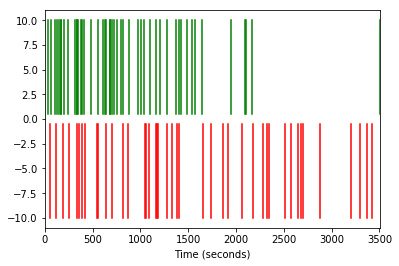

In [112]:
drawBoundry(shotMakar,sceneTime_auto_bin,0,len(sceneTime_auto_bin))

In [121]:
len(sceneTime_auto_bin_old)

48

In [119]:
print(shotMakar[-1],sceneTime_auto_bin_old[-4],sceneTime_auto_bin[-4])
for i in range(len(sceneTime_auto_bin)):
    try:
        print(shotMakar[i],sceneTime_auto_bin_old[i],sceneTime_auto_bin[i])
    except:
        print (sceneTime_auto_bin_old[i])

3545.84 2091.2400000000002 2091.2400000000002
58.28 31.720000000000002 31.720000000000002
114.36 65.36 65.36
186.36 108.0 108.0
258.52 132.92000000000002 132.92000000000002
337.4 153.08 153.08
363.96 165.68 165.68
391.4 171.48 171.48
418.8 198.08 198.08
544.44 239.72 239.72
557.44 321.68 321.68
642.96 336.04 336.04
698.8 340.16 340.16
822.8 348.28000000000003 348.28000000000003
874.16 377.76 377.76
1049.72 392.52 392.52
1060.84 412.32 412.32
1090.92 479.08 479.08
1165.68 561.04 561.04
1173.64 612.96 612.96
1187.4 628.92 628.92
1278.8 640.0 640.0
1332.16 678.32 678.32
1379.84 687.28 687.28
1407.6 705.12 705.12
1655.88 725.4 725.4
1742.88 754.96 754.96
1867.6 794.36 794.36
1914.36 822.84 822.84
2059.96 877.36 877.36
2180.28 979.52 979.52
2278.32 1004.24 1004.24
2327.4 1033.76 1033.76
2349.08 1106.3600000000001 1106.3600000000001
2516.72 1165.72 1165.72
2574.64 1210.32 1210.32
2653.36 1276.08 1276.08
2683.16 1369.44 1369.44
2703.04 1405.76 1405.76
2877.2 1426.76 1426.76
3198.44 1487.76 14

41


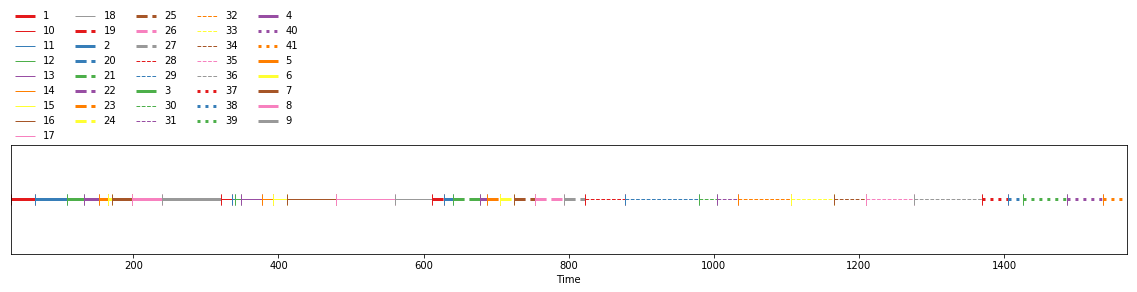

In [79]:
hypothesis = Annotation()
for i in range(1,len(sceneTime)):
    hypothesis[Segment(sceneTime_auto_bin[i-1], sceneTime_auto_bin[i])] = str(i)
print(i)
hypothesis

43


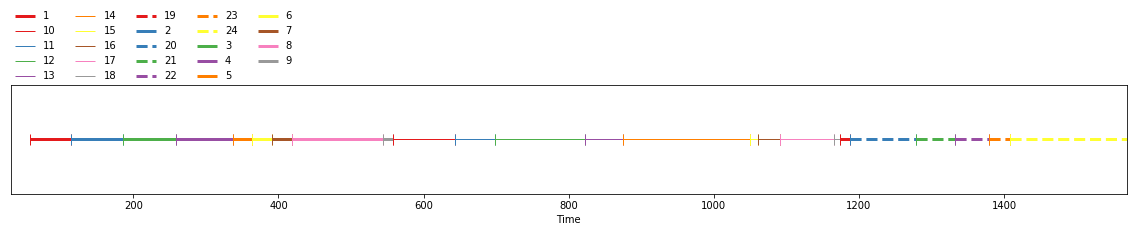

In [75]:
reference = Annotation()
for i in range(1,len(sc_end)):
    reference[Segment(sc_end[i-1]/1000, sc_end[i]/1000)] = str(i)
print(i)
reference

In [89]:
sepPos=sg.segmentation_speakers(predictedsClusters1,7,4)
sceneTime=[]
for i in sepPos:
    sceneTime.append(int(shotEnd[i]))

[[4, 4]]


In [90]:
len(sceneTime)

39

In [91]:
sceneTime.insert(0,0.0)

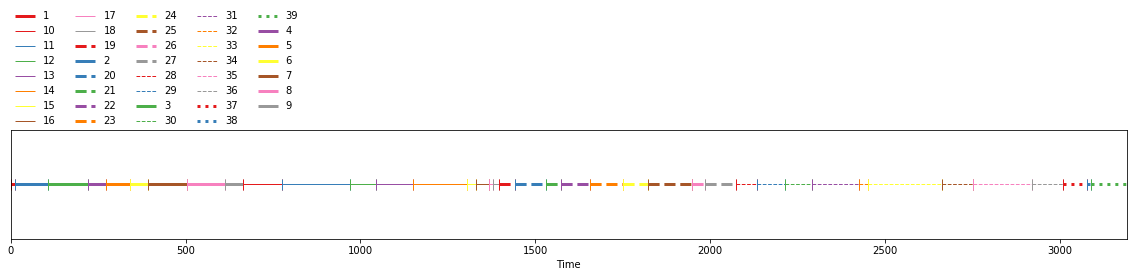

In [92]:
hypothesis = Annotation()
for i in range(1,len(sceneTime)):
    hypothesis[Segment(sceneTime[i-1], sceneTime[i])] = str(i)
hypothesis

In [93]:
sceneTime[2],sc_end[2]

(106, 202720)

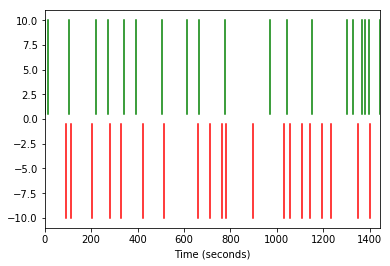

In [94]:
drawBoundry(sceneTimeman[0:20],sceneTime[0:20],0,20)

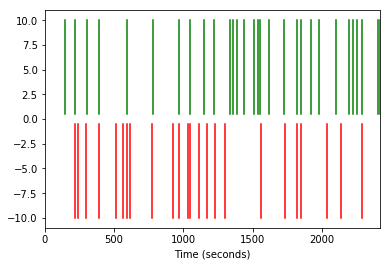

In [117]:
drawBoundry(shotMakar,sceneTime,0,len(shotMakar))

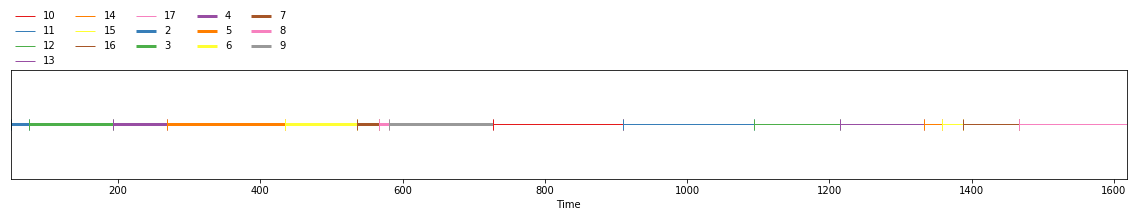

In [177]:
reference

In [159]:
indx,len(shotMakar),len(truthValueManual_bin),len(shotEnd)

(29, 30, 810, 810)

In [160]:
len(truthValueAuto)

810

In [162]:
indx,len(shotMakar),len(truthValueManual),len(shotEnd)

(29, 30, 810, 810)

In [163]:
print(truthValueManual_bin)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 

In [164]:
shotMakar[0],shotEnd[0]

(219.6, 6.48)

In [58]:
from collections import deque
from itertools import combinations
import cv2
import networkx as nx
from pyannote.core import Annotation
from tqdm import tqdm
import warnings
from pyannote.video import Shot, Thread
import itertools
from string import ascii_uppercase

In [59]:
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)
def string_generator(skip=[]):

    # label length
    r = 1

    # infinite loop
    while True:

        # generate labels with current length
        for c in itertools.product(ascii_uppercase, repeat=r):
            if c in skip:
                continue
            yield ''.join(c)

        # increment label length when all possibilities are exhausted
        r = r + 1

In [76]:
def scenesTransition(threads):

    g = nx.Graph()

    # connect adjacent shots
    for shot1, shot2 in pairwise(threads):
        g.add_edge(shot1, shot2)

    """# connect threaded shots
    for label in threads.labels():
        for shot1, shot2 in pairwise(threads.subset([label]).itertracks()):
            g.add_edge(shot1, shot2)"""

    scenes = threads.copy()

    # group all shots of intertwined threads
    for shots in sorted(sorted(bc) for bc in nx.biconnected_components(g)):

        if len(shots) < 3:
            continue

        common_label = scenes[shots[0]]
        for shot in shots:
            scenes[shot] = common_label

    return scenes,g

In [77]:
pairs=pairwise(predictedsClusters1)
pairunique=set(predictedsClusters1)

In [66]:
pairsString=string_generator(predictedsClusters1)
pairunique=string_generator(pairunique)

In [61]:
print(pairsString)

<generator object string_generator at 0x7fbf1defe150>


In [71]:
for i in pairs:
    print(i)

(33, 33)
(33, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 14)
(14, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 18)
(18, 18)
(18, 18)
(18, 14)
(14, 18)
(18, 14)
(14, 7)
(7, 30)
(30, 18)
(18, 18)
(18, 18)
(18, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 18)
(18, 14)
(14, 14)
(14, 18)
(18, 14)
(14, 18)
(18, 18)
(18, 18)
(18, 14)
(14, 30)
(30, 7)
(7, 18)
(18, 1)
(1, 7)
(7, 1)
(1, 25)
(25, 30)
(30, 7)
(7, 18)
(18, 7)
(7, 18)
(18, 7)
(7, 7)
(7, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 20)
(20, 1)
(1, 1)
(1, 7)
(7, 1)
(1, 7)
(7, 5)
(5, 20)
(20, 7)
(7, 38)
(38, 1)
(1, 20)
(20, 3)
(3, 26)
(26, 1)
(1, 20)
(20, 1)
(1, 12)
(12, 5)
(5, 28)
(28, 10)
(10, 27)
(27, 26)
(26, 20)
(20, 35)
(35, 26)
(26, 35)
(35, 3)
(3, 35)
(35, 20)
(20, 35)
(35, 20)
(20, 35)
(35, 10)
(10, 38)
(38, 26)
(26, 32)
(32, 8)
(8, 3)
(3, 21)
(21, 32)
(32, 32)
(32, 11)
(11, 32)
(32, 32)
(32, 3)
(3, 20)
(20, 3)
(3, 26)
(26, 26)
(26, 26)
(26, 21)
(21, 26)
(26, 20)
(20, 5)
(5, 38)
(38, 35)
(35, 38)
(38, 12)
(12, 38)
(38, 20)
(20

In [78]:
scene,G=scenesTransition(predictedsClusters1)

In [84]:
print(scene)

[33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 18, 33, 33, 33, 33, 33, 33, 7, 18, 1, 7, 1, 25, 30, 7, 18, 7, 18, 7, 7, 30, 30, 30, 30, 30, 30, 20, 1, 1, 7, 1, 7, 5, 20, 7, 38, 1, 20, 3, 26, 1, 20, 1, 12, 5, 28, 10, 27, 26, 20, 35, 26, 35, 3, 35, 20, 35, 20, 35, 10, 38, 26, 32, 8, 3, 21, 32, 32, 11, 32, 32, 3, 20, 3, 26, 26, 26, 21, 26, 20, 5, 38, 35, 38, 12, 38, 20, 20, 20, 35, 20, 20, 12, 27, 12, 15, 15, 37, 22, 25, 13, 38, 13, 13, 25, 22, 26, 9, 22, 22, 26, 37, 38, 13, 11, 9, 9, 11, 13, 32, 38, 37, 15, 15, 15, 15, 15, 32, 11, 9, 22, 13, 10, 10, 10, 25, 10, 10, 37, 22, 28, 10, 10, 31, 10, 22, 22, 5, 22, 22, 38, 35, 27, 5, 26, 38, 22, 10, 39, 5, 37, 39, 38, 37, 37, 10, 38, 10, 38, 10, 5, 10, 38, 38, 22, 38, 17, 5, 10, 22, 38, 27, 37, 37, 9, 38, 17, 27, 37, 9, 11, 5, 12, 10, 5, 12, 22, 22, 22, 22, 12, 10, 12, 17, 13, 37, 39, 9, 37, 9, 22, 10, 9, 22, 22, 22, 39, 37, 22, 5, 39, 12, 37, 24, 13, 39, 28, 37

In [85]:
print(predictedsClusters1)

[33, 33, 4, 4, 4, 4, 14, 4, 4, 4, 4, 4, 4, 18, 18, 18, 14, 18, 14, 7, 30, 18, 18, 18, 14, 14, 14, 14, 14, 14, 18, 14, 14, 18, 14, 18, 18, 18, 14, 30, 7, 18, 1, 7, 1, 25, 30, 7, 18, 7, 18, 7, 7, 30, 30, 30, 30, 30, 30, 20, 1, 1, 7, 1, 7, 5, 20, 7, 38, 1, 20, 3, 26, 1, 20, 1, 12, 5, 28, 10, 27, 26, 20, 35, 26, 35, 3, 35, 20, 35, 20, 35, 10, 38, 26, 32, 8, 3, 21, 32, 32, 11, 32, 32, 3, 20, 3, 26, 26, 26, 21, 26, 20, 5, 38, 35, 38, 12, 38, 20, 20, 20, 35, 20, 20, 12, 27, 12, 15, 15, 37, 22, 25, 13, 38, 13, 13, 25, 22, 26, 9, 22, 22, 26, 37, 38, 13, 11, 9, 9, 11, 13, 32, 38, 37, 15, 15, 15, 15, 15, 32, 11, 9, 22, 13, 10, 10, 10, 25, 10, 10, 37, 22, 28, 10, 10, 31, 10, 22, 22, 5, 22, 22, 38, 35, 27, 5, 26, 38, 22, 10, 39, 5, 37, 39, 38, 37, 37, 10, 38, 10, 38, 10, 5, 10, 38, 38, 22, 38, 17, 5, 10, 22, 38, 27, 37, 37, 9, 38, 17, 27, 37, 9, 11, 5, 12, 10, 5, 12, 22, 22, 22, 22, 12, 10, 12, 17, 13, 37, 39, 9, 37, 9, 22, 10, 9, 22, 22, 22, 39, 37, 22, 5, 39, 12, 37, 24, 13, 39, 28, 37, 22, 5, 28

In [86]:
uni=set(scene)
print(uni)

{0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}


In [148]:
def buildGraph(list):
    G=nx.Graph()
    #G.add_nodes_from(set(list))
    for i in range(len(list)):
        if not (list[i-1]==list[i]):
            G.add_node(list[i-1])
            G.add_edge(list[i-1],list[i],label=(str(list[i-1])+'_'+str(list[i])))
    return G

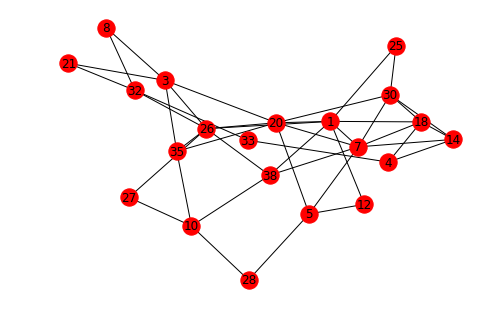

In [158]:
import matplotlib.pylab as plt
G=buildGraph(predictedsClusters1[0:100])
#G.to_directed()
nx.draw(G,with_labels = True,edge_labels=True)
plt.show()

In [126]:
print(predictedsClusters1[0:30])

[33, 33, 4, 4, 4, 4, 14, 4, 4, 4, 4, 4, 4, 18, 18, 18, 14, 18, 14, 7, 30, 18, 18, 18, 14, 14, 14, 14, 14, 14]


In [139]:
print(G.edges)

[(23, 33), (23, 16), (23, 2), (33, 4), (4, 14), (4, 18), (14, 18), (14, 7), (14, 30), (18, 30), (18, 7), (18, 1), (7, 30), (7, 1), (7, 5), (7, 20), (7, 38), (30, 25), (30, 20), (1, 25), (1, 20), (1, 38), (1, 26), (1, 12), (25, 22), (25, 13), (25, 10), (20, 5), (20, 3), (20, 26), (20, 35), (20, 38), (20, 12), (5, 12), (5, 28), (5, 38), (5, 22), (5, 27), (5, 26), (5, 39), (5, 37), (5, 10), (5, 17), (5, 11), (38, 10), (38, 26), (38, 35), (38, 12), (38, 13), (38, 37), (38, 32), (38, 22), (38, 39), (38, 17), (38, 27), (38, 9), (3, 26), (3, 35), (3, 8), (3, 21), (3, 32), (26, 27), (26, 35), (26, 32), (26, 21), (26, 22), (26, 9), (26, 37), (12, 27), (12, 15), (12, 10), (12, 22), (12, 17), (12, 39), (12, 37), (12, 28), (12, 31), (28, 10), (28, 22), (28, 39), (28, 37), (28, 27), (28, 13), (28, 19), (10, 27), (10, 35), (10, 13), (10, 37), (10, 31), (10, 22), (10, 39), (10, 9), (27, 35), (27, 37), (27, 17), (27, 19), (27, 31), (27, 13), (27, 29), (27, 39), (32, 8), (32, 21), (32, 11), (32, 13), (

In [179]:
nx.edge_connectivity(G)

2

In [176]:
 from networkx.algorithms.flow import min

In [178]:
len(minimum_st_edge_cut(G))

TypeError: minimum_st_edge_cut() missing 2 required positional arguments: 's' and 't'

In [163]:
networkx.draw_networkx?

In [6]:
'/vol/work3/berhe/ExtractedFeatures/GoT/'=='/vol/work3/berhe/ExtractedFeatures/GoT/'

True

In [8]:
'/vol/work3/maurice/dvd_extracted/GameOfThrones/'=='/vol/work3/maurice/dvd_extracted/GameOfThrones/'

True

In [55]:
import os 
videoFiles='/vol/work3/maurice/dvd_extracted/BreakingBad/'
saveFiles='/vol/work3/berhe/ExtractedFeatures/GoT/'
saveFiles1='/vol/work3/berhe/ExtractedFeatures/BB/'

videofilesFiles=[]
for fl in os.listdir(videoFiles):
    if '.mkv' in fl:
        print(videoFiles+fl)

/vol/work3/maurice/dvd_extracted/BreakingBad/BreakingBad.Season01.Episode01.mkv
/vol/work3/maurice/dvd_extracted/BreakingBad/BreakingBad.Season01.Episode02.mkv
/vol/work3/maurice/dvd_extracted/BreakingBad/BreakingBad.Season01.Episode03.mkv
/vol/work3/maurice/dvd_extracted/BreakingBad/BreakingBad.Season01.Episode07.mkv
/vol/work3/maurice/dvd_extracted/BreakingBad/BreakingBad.Season01.Episode04.mkv
/vol/work3/maurice/dvd_extracted/BreakingBad/BreakingBad.Season01.Episode05.mkv
/vol/work3/maurice/dvd_extracted/BreakingBad/BreakingBad.Season01.Episode06.mkv
/vol/work3/maurice/dvd_extracted/BreakingBad/BreakingBad.Season02.Episode01.mkv
/vol/work3/maurice/dvd_extracted/BreakingBad/BreakingBad.Season02.Episode02.mkv
/vol/work3/maurice/dvd_extracted/BreakingBad/BreakingBad.Season02.Episode03.mkv
/vol/work3/maurice/dvd_extracted/BreakingBad/BreakingBad.Season02.Episode04.mkv
/vol/work3/maurice/dvd_extracted/BreakingBad/BreakingBad.Season02.Episode05.mkv
/vol/work3/maurice/dvd_extracted/Breakin

In [165]:
seasonTime=[]
for j in range(3,4):
    print (j)
    timeStamp_GoT=[]
    for file in os.listdir(saveFiles1):
        s='Season0'+str(j)
        if s in file:
            if file.endswith('.pkl'):
                with open(saveFiles1+file, 'rb') as f:
                    timeStamp=pickle.load(f)
                timeStamp_GoT.append(timeStamp[-1])
                print(file,timeStamp[-1]/1000)
        else:
            continue
    seasonTime.append(sum(timeStamp_GoT))

3
BreakingBad.Season03.Episode01.mkv_frameTimeStamp.pkl 2721.0
BreakingBad.Season03.Episode05.mkv_frameTimeStamp.pkl 2722.0
BreakingBad.Season03.Episode11.mkv_frameTimeStamp.pkl 2721.0
BreakingBad.Season03.Episode02.mkv_frameTimeStamp.pkl 2719.0
BreakingBad.Season03.Episode03.mkv_frameTimeStamp.pkl 2721.0
BreakingBad.Season03.Episode04.mkv_frameTimeStamp.pkl 2721.0
BreakingBad.Season03.Episode06.mkv_frameTimeStamp.pkl 2722.0
BreakingBad.Season03.Episode07.mkv_frameTimeStamp.pkl 2722.0
BreakingBad.Season03.Episode08.mkv_frameTimeStamp.pkl 2723.0
BreakingBad.Season03.Episode09.mkv_frameTimeStamp.pkl 2721.0
BreakingBad.Season03.Episode10.mkv_frameTimeStamp.pkl 2723.0
BreakingBad.Season03.Episode12.mkv_frameTimeStamp.pkl 2722.0
BreakingBad.Season03.Episode13.mkv_frameTimeStamp.pkl 2722.0


In [166]:
timeStamp[-1]/60000

45.36666666666667

In [167]:
print((sum(seasonTime)/len(seasonTime))/3600000)

9.827777777777778


In [168]:
len(seasonTime)

1

In [127]:
sumTime=sum(timeStamp_GoT)/60000
avg=sumTime/(len(timeStamp_GoT))
print(avg,sumTime)

45.74206896551724 2653.04


In [50]:
s=sumTime/36000000

In [51]:
s,sumTime

(7.369555555555556e-05, 2653.04)

In [58]:
manAnnotation='/people/berhe/Bureau/TLP_thesis/codes/AnnotatedScene/BreakingBad/'
sc_end=[]
for file in os.listdir(manAnnotation):
    if
    for fn os.
    Df=pd.read_csv(manAnnotation+file, delimiter="\t")
    sc_end.append(len(Df['end']))
    print(file)

S01E03
S01E06
S01E04
S01E02
S01E01
S01E05
S01E07


In [225]:
manAnnotation='/people/berhe/Bureau/TLP_thesis/codes/AnnotatedScene/BreakingBad/'
sc_end=[]
sc_end_time=[]
sc_end_time_start=[]
for file in os.listdir(manAnnotation):
    for j in range(3,4):
        s='season'+str(j)
        if s in file:
            for fn in os.listdir(manAnnotation+file):
                if fn=='Scenes':
                    for f in os.listdir(manAnnotation+file+'/'+fn):
                        print(f)
                        Df=pd.read_csv(manAnnotation+file+'/'+fn+'/'+f, delimiter="\t")
                        sc_end.append(len(Df['end']))
                        sc_end_time.append(Df['end'])
                        sc_end_time_start.append(Df['start'])

S03E07
S03E04
S03E12
S03E11
S03E09
S03E01
S03E13
S03E03
S03E08
S03E10
S03E02
S03E05
S03E06


In [226]:
len(sc_end),len(sc_end_time),len(sc_end_time[1]),len(sc_end_time[2])

(13, 13, 24, 22)

In [227]:
dif=[]
for i in range(len(sc_end_time)):
    for j in range(len(sc_end_time[i])):
        dif.append(sc_end_time[i][j]-sc_end_time_start[i][j])

In [228]:
a=[len(sc_end_time[i]) for i in range(len(sc_end_time))]

In [230]:
len(dif)

270

In [231]:
print((sum(dif)/len(dif))/1000)

131.03792592592592
